# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#output file
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
   
    #create endpoint
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(query_url + city).json()
        city_weather = (requests.get(city_url)).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        #foundCities.append(city)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | hobyo
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | novoishimskiy
Processing Record 10 of Set 1 | murzuq
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | mahajanga
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | al ghayzah
Processing Record 17 of Set 1 | mwingi
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | labytnangi
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,13.97,31,17,3.07,US,1713817741
1,hobyo,5.3505,48.5268,29.43,73,100,5.63,SO,1713817753
2,badger,64.8000,-147.5333,6.05,78,96,0.95,US,1713817761
3,kavaratti,10.5669,72.6420,29.90,75,84,4.13,IN,1713817759
4,east london,-33.0153,27.9116,19.15,81,94,3.73,ZA,1713817809


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,13.97,31,17,3.07,US,1713817741
1,hobyo,5.3505,48.5268,29.43,73,100,5.63,SO,1713817753
2,badger,64.8000,-147.5333,6.05,78,96,0.95,US,1713817761
3,kavaratti,10.5669,72.6420,29.90,75,84,4.13,IN,1713817759
4,east london,-33.0153,27.9116,19.15,81,94,3.73,ZA,1713817809


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

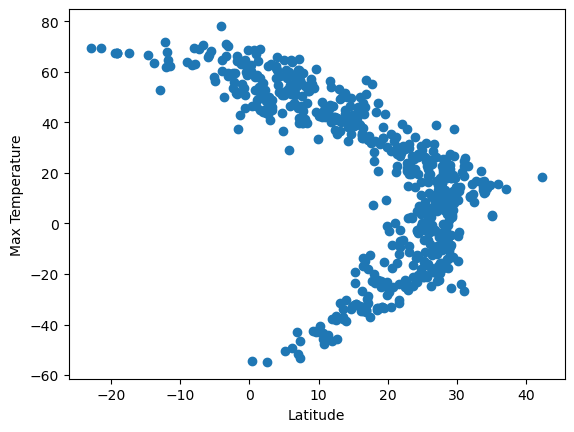

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

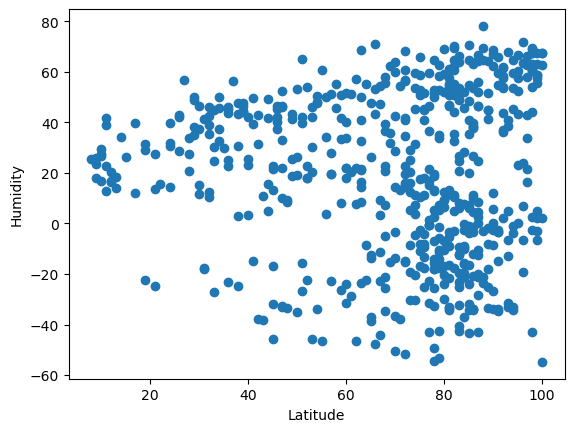

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

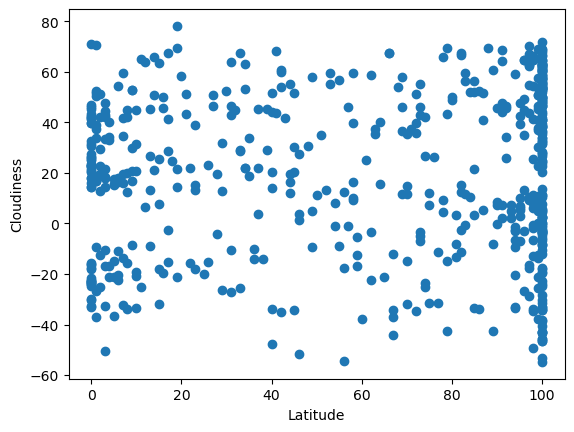

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

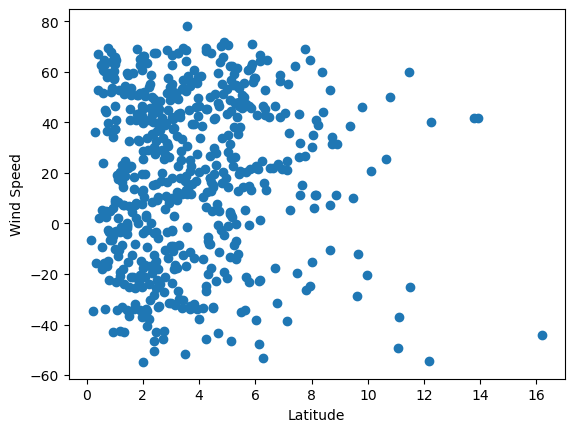

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,13.97,31,17,3.07,US,1713817741
1,hobyo,5.3505,48.5268,29.43,73,100,5.63,SO,1713817753
2,badger,64.8000,-147.5333,6.05,78,96,0.95,US,1713817761
3,kavaratti,10.5669,72.6420,29.90,75,84,4.13,IN,1713817759
8,novoishimskiy,53.1981,66.7694,12.94,50,34,3.39,KZ,1713817991


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,east london,-33.0153,27.9116,19.15,81,94,3.73,ZA,1713817809
5,hithadhoo,-0.6000,73.0833,28.14,77,100,1.45,MV,1713817757
6,port-aux-francais,-49.3500,70.2167,6.09,78,98,11.08,TF,1713817720
7,blackmans bay,-43.0167,147.3167,9.59,87,100,2.47,AU,1713817742
11,namibe,-15.1961,12.1522,25.23,72,17,1.47,AO,1713817887


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8870661068614549


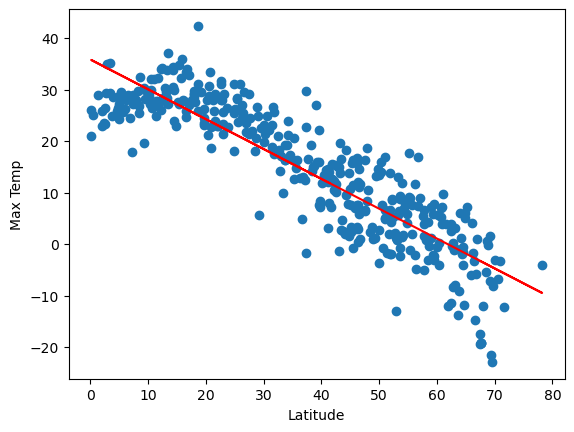

In [21]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))


The r-value is: 0.8283698454761528


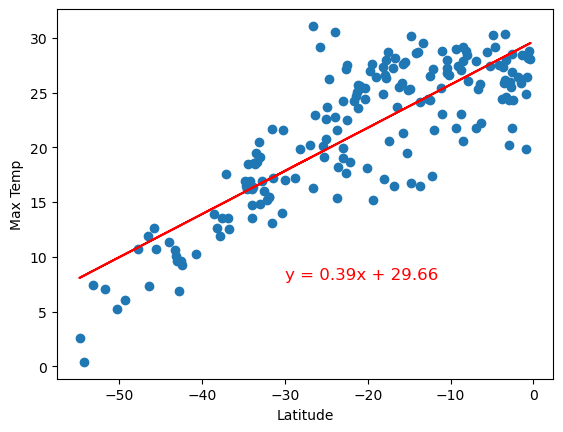

In [22]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))


**Discussion about the linear relationship:** 

There seems to be a significant relationship between latitude and temperature, with the temperature increasing as the latitude decreases. This follows common sense logic as the latitude decreases the closer you get to the Equator, which is where the temperature is known to be hottest. This is due to the significant increase in sun exposure as you approach the Equator. This trend holds true in both the Southern and Northern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24514513092292867


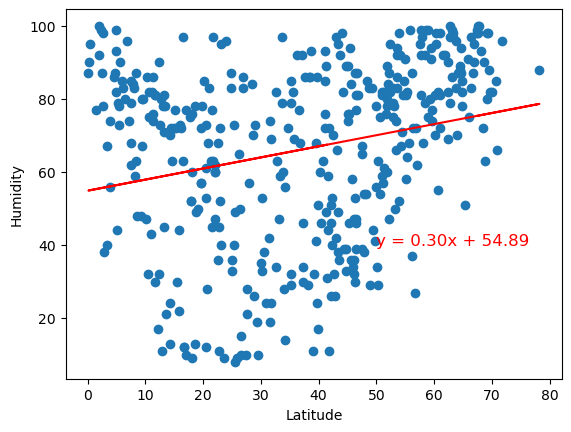

In [23]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))


The r-value is: 0.22320554066863404


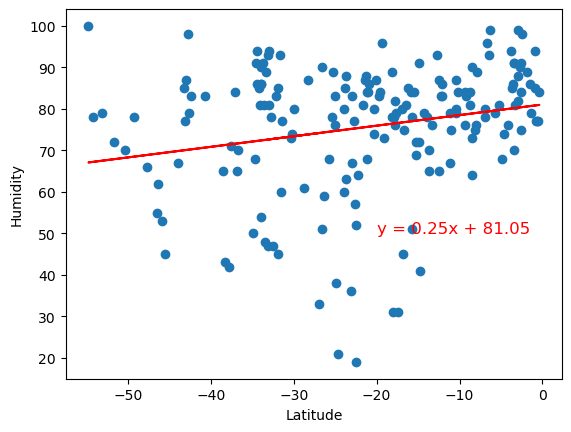

In [24]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))


**Discussion about the linear relationship:** 

There is a positive correlation between latitude and humidity in both the Northern and Southern hemispheres. This follows common sense logic again, as 0 degrees latitude is the Equator, where most of the climates are more tropical, i.e., high in humidity. It is interesting to note that there is a smaller correlation between humidity and latitude than there is between temperature and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1459289868564533


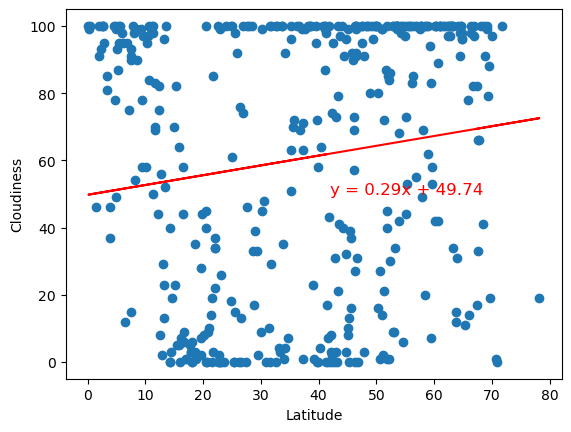

In [25]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))


The r-value is: 0.0275294748236081


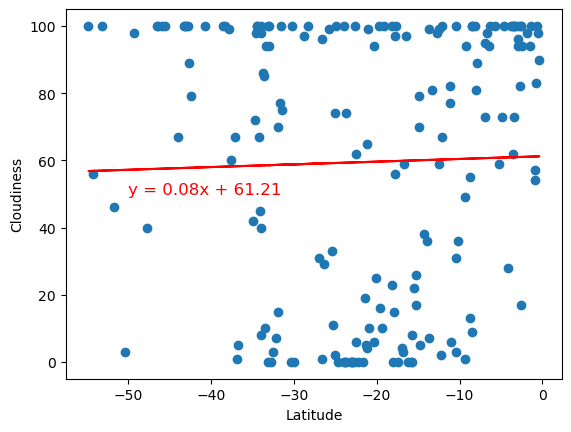

In [26]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))


**Discussion about the linear relationship:** 

There is a small positive correlation between cloudiness and latitude in the Northern Hemisphere, but no significant correlation in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0062059494339486345


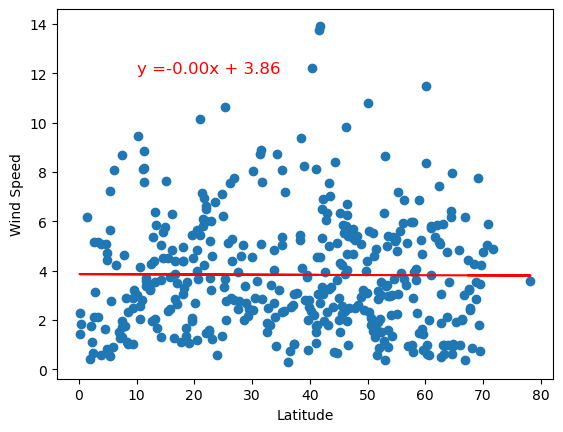

In [27]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))


The r-value is: -0.22842591657670824


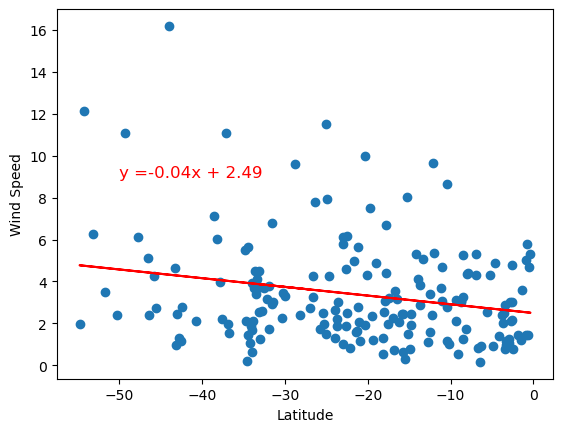

In [28]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))


**Discussion about the linear relationship:** 

There seems to be no significant correlation between latitude and wind speed in either hemisphere.